# Carga un dataset de la libreria `pydataset` 

Puedes elegir la que más te guste! 

Hint: ten en cuenta que os pediremos que hagais algunas transformaciones usando `apply` y `groupby`! 

In [ ]:
import pandas as pd
import numpy as np
import datetime

# Explora el dataset elegido 

- Cuantas columnas tenemos
- Cuantos nulos
- Haz una descripción
- ¿Puedes homogeneizar el nombre de las columnas?

Tómate tu tiempo para entender el dataframe y la información que hay en el. Y escribe brevemente las conclusiones principales de el dataset elegido. 

**No te olvides de guardar tu nuevo csv limpio**

In [ ]:
data = pd.read_csv("electronic-card-transactions-december-2021-csv-tables.csv")
data.sample(10)
'''Importamos un csv con datos sobre transacciones realizadas con tarjetas en NZ. Queremos sacar la media del valor de las transacciones por año y la evolución anual de las mismas
'''

In [ ]:
data.columns

In [4]:
data.shape

(18346, 14)

In [5]:
data.info

<bound method DataFrame.info of       Series_reference   Period  Data_value Suppressed STATUS    UNITS  \
0           ECTA.S19A1  2001.03      2462.5        NaN      F  Dollars   
1           ECTA.S19A1  2002.03     17177.2        NaN      F  Dollars   
2           ECTA.S19A1  2003.03     22530.5        NaN      F  Dollars   
3           ECTA.S19A1  2004.03     28005.1        NaN      F  Dollars   
4           ECTA.S19A1  2005.03     30629.6        NaN      F  Dollars   
...                ...      ...         ...        ...    ...      ...   
18341       ECTQ.S4AXP  2020.12        38.6        NaN      F  Percent   
18342       ECTQ.S4AXP  2021.03        38.4        NaN      F  Percent   
18343       ECTQ.S4AXP  2021.06        38.0        NaN      F  Percent   
18344       ECTQ.S4AXP  2021.09        34.8        NaN      F  Percent   
18345       ECTQ.S4AXP  2021.12        32.9        NaN      F  Percent   

       Magnitude                                        Subject  \
0           

In [6]:
data.dtypes

Series_reference     object
Period              float64
Data_value          float64
Suppressed           object
STATUS               object
UNITS                object
Magnitude             int64
Subject              object
Group                object
Series_title_1       object
Series_title_2       object
Series_title_3       object
Series_title_4      float64
Series_title_5      float64
dtype: object

In [7]:
data.isnull().sum()

Series_reference        0
Period                  0
Data_value           1541
Suppressed          17926
STATUS                  0
UNITS                   0
Magnitude               0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2          0
Series_title_3      14730
Series_title_4      18346
Series_title_5      18346
dtype: int64

In [8]:
data = data.drop(["Suppressed"], axis=1)
'''Vamos a eliminar de nuestro dataframe todas las columnas vacías para limpiar los datos que nos son inservibles'''

'Vamos a eliminar de nuestro dataframe todas las columnas vacías para limpiar los datos que nos son inservibles'

In [9]:
data = data.drop(["Series_title_3"], axis=1)

In [10]:
data = data.drop(["Series_title_5"], axis=1)

In [11]:
data = data.drop(["Series_title_4"], axis=1)

In [12]:
data.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2
0,ECTA.S19A1,2001.03,2462.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
1,ECTA.S19A1,2002.03,17177.2,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
2,ECTA.S19A1,2003.03,22530.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
3,ECTA.S19A1,2004.03,28005.1,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
4,ECTA.S19A1,2005.03,30629.6,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries


In [13]:
print(data["UNITS"].unique())


['Dollars' 'Number' 'Percent']


In [14]:
print(data["Period"].unique())

[2001.03 2002.03 2003.03 2004.03 2005.03 2006.03 2007.03 2008.03 2009.03
 2010.03 2011.03 2012.03 2013.03 2014.03 2015.03 2016.03 2017.03 2018.03
 2019.03 2020.03 2021.03 2000.03 2000.01 2000.02 2000.04 2000.05 2000.06
 2000.07 2000.08 2000.09 2000.1  2000.11 2000.12 2001.01 2001.02 2001.04
 2001.05 2001.06 2001.07 2001.08 2001.09 2001.1  2001.11 2001.12 2002.01
 2002.02 2002.04 2002.05 2002.06 2002.07 2002.08 2002.09 2002.1  2002.11
 2002.12 2003.01 2003.02 2003.04 2003.05 2003.06 2003.07 2003.08 2003.09
 2003.1  2003.11 2003.12 2004.01 2004.02 2004.04 2004.05 2004.06 2004.07
 2004.08 2004.09 2004.1  2004.11 2004.12 2005.01 2005.02 2005.04 2005.05
 2005.06 2005.07 2005.08 2005.09 2005.1  2005.11 2005.12 2006.01 2006.02
 2006.04 2006.05 2006.06 2006.07 2006.08 2006.09 2006.1  2006.11 2006.12
 2007.01 2007.02 2007.04 2007.05 2007.06 2007.07 2007.08 2007.09 2007.1
 2007.11 2007.12 2008.01 2008.02 2008.04 2008.05 2008.06 2008.07 2008.08
 2008.09 2008.1  2008.11 2008.12 2009.01 2009.02 200

In [20]:
def extraer_año(x):
    año = datetime.datetime.strptime(x.split(".")[0], "%Y")
    
    return año

In [21]:
data = data.astype({"Period": 'str'})

In [22]:
data.dtypes


Series_reference     object
Period               object
Data_value          float64
STATUS               object
UNITS                object
Magnitude             int64
Subject              object
Group                object
Series_title_1       object
Series_title_2       object
dtype: object

In [29]:
data["year"] = data["Period"].apply(extraer_año)
data

,Series_reference,Period,Data_value,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,year
0,ECTA.S19A1,2001.03,2462.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2001-01-01
1,ECTA.S19A1,2002.03,17177.2,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2002-01-01
2,ECTA.S19A1,2003.03,22530.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2003-01-01
3,ECTA.S19A1,2004.03,28005.1,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2004-01-01
4,ECTA.S19A1,2005.03,30629.6,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...
18341,ECTQ.S4AXP,2020.12,38.6,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2020-01-01
18342,ECTQ.S4AXP,2021.03,38.4,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01
18343,ECTQ.S4AXP,2021.06,38.0,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01
18344,ECTQ.S4AXP,2021.09,34.8,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01


In [25]:
print(data["Group"].unique())

'''Evaluamos los datos que nos devuelve el dataframe y vemos que no solo contabiliza valores de las transacciones, sino que además de ello da datos sobre cambios porcentuales y sobre número de transacciones'''


['Total values - Electronic card transactions A/S/T by division'
 'Values - Electronic card transactions A/S/T by industry group'
 'Number of electronic card transactions A/S/T by division'
 'Electronic card transactions by mean and proportion'
 'Totals - Electronic card transactions by division, percentage changes']


'Evaluamos los datos que nos devuelve el dataframe y vemos que no solo contabiliza valores de las transacciones, sino que además de ello da datos sobre cambios porcentuales y sobre número de transacciones'

In [26]:
print(data["Series_title_2"].unique())

['RTS total industries' 'RTS core industries' 'Total' 'Credit' 'Debit'
 'Consumables' 'Durables' 'Hospitality' 'Services' 'Apparel'
 'Motor vehicles excl. fuel' 'Fuel' 'Non-retail excl. services'
 'Mean transaction value' 'Mean value of transaction per person'
 'Mean number of transactions per person'
 'ECT core retail as a proportion of core Retail Trade Survey'
 'ECT retail as a proportion of total Retail Trade Survey'
 'Credit card usage as a proportion of total ECT value'
 'Debit card usage as a proportion of total ECT value']


In [27]:
print(data["Series_title_1"].unique())

['Actual' 'Seasonally adjusted' 'Trend']


In [28]:
data.rename(columns={'Series_title_2':'Sector', 'Series_title_1':'Temporalidad'})

,Series_reference,Period,Data_value,STATUS,UNITS,Magnitude,Subject,Group,Temporalidad,Sector,year
0,ECTA.S19A1,2001.03,2462.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2001-01-01
1,ECTA.S19A1,2002.03,17177.2,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2002-01-01
2,ECTA.S19A1,2003.03,22530.5,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2003-01-01
3,ECTA.S19A1,2004.03,28005.1,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2004-01-01
4,ECTA.S19A1,2005.03,30629.6,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...
18341,ECTQ.S4AXP,2020.12,38.6,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2020-01-01
18342,ECTQ.S4AXP,2021.03,38.4,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01
18343,ECTQ.S4AXP,2021.06,38.0,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01
18344,ECTQ.S4AXP,2021.09,34.8,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,2021-01-01


In [51]:
gasto = pd.DataFrame(data.groupby(["year"]) ["Data_value"].mean())
gasto

,Data_value
year,
2000-01-01,NaN
2001-01-01,2.462500e+03
2002-01-01,5.837402e+06
2003-01-01,5.601631e+06
2004-01-01,8.470781e+06
2005-01-01,9.272857e+06
2006-01-01,1.006611e+07
2007-01-01,1.098289e+07
2008-01-01,1.179224e+07


In [52]:
gasto = gasto.drop(["2000-01-01"], axis=0)


In [53]:
gasto

,Data_value
year,
2001-01-01,2.462500e+03
2002-01-01,5.837402e+06
2003-01-01,5.601631e+06
2004-01-01,8.470781e+06
2005-01-01,9.272857e+06
2006-01-01,1.006611e+07
2007-01-01,1.098289e+07
2008-01-01,1.179224e+07
2009-01-01,1.249327e+07


In [56]:
gasto = gasto.reset_index()
gasto

,year,Data_value
0,2001-01-01,2.462500e+03
1,2002-01-01,5.837402e+06
2,2003-01-01,5.601631e+06
3,2004-01-01,8.470781e+06
4,2005-01-01,9.272857e+06
5,2006-01-01,1.006611e+07
6,2007-01-01,1.098289e+07
7,2008-01-01,1.179224e+07
8,2009-01-01,1.249327e+07
9,2010-01-01,1.325177e+07


In [54]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


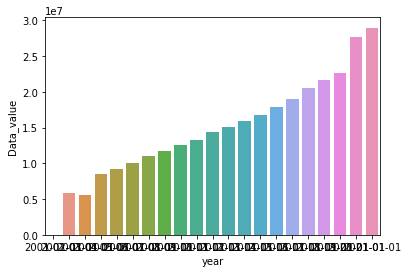

In [94]:
sns.barplot(data=gasto, x="year", y="Data_value");

# Crea alguna función y aplícala a tu dataframe usando `apply`

In [91]:

def incremento (x):
    diferencia = 0
    diferencia = x - diferencia
    
       
    return diferencia

In [92]:
gasto["crecimiento"] = data["Data_value"].apply(incremento)
gasto

,year,Data_value,crecimiento
0,2001-01-01,2.462500e+03,2462.5
1,2002-01-01,5.837402e+06,17177.2
2,2003-01-01,5.601631e+06,22530.5
3,2004-01-01,8.470781e+06,28005.1
4,2005-01-01,9.272857e+06,30629.6
5,2006-01-01,1.006611e+07,33317.4
6,2007-01-01,1.098289e+07,36422.0
7,2008-01-01,1.179224e+07,39198.0
8,2009-01-01,1.249327e+07,40629.4
9,2010-01-01,1.325177e+07,41815.4


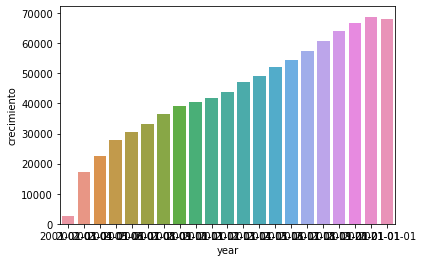

In [95]:
sns.barplot(data=gasto, x="year", y="crecimiento");

# Aplica el conocimiento del groupby en tu dataframe y saca algunas conclusiones (practica el *story telling*)

**BONUS** Plotea algunas de las conclusiones que hayas podido extraer

In [ ]:
data.loc[:, "Period"]

In [ ]:
data.groupby(["Period", "Data_value"]).sum()